In [1]:
%matplotlib inline 
from IPython.display import display 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
from sklearn.datasets import load_boston
boston = load_boston
X, y = mglearn.datasets.load_extended_boston()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=0)
from sklearn.linear_model import Lasso

In [6]:
lasso = Lasso().fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 피처의 개수:", np.sum(lasso.coef_!=0))

# 과소적합 조절하기 위해 alpha값 1보다 낮출필요

학습용 데이터 세트 점수: 0.29
평가용 데이터 세트 점수: 0.21
사용한 피처의 개수: 4


In [9]:
print(X_train)

[[0.00207947 0.22       0.19794721 ... 0.96119883 0.45259981 0.21311573]
 [0.00108981 0.25       0.17118768 ... 1.         0.2066777  0.04271567]
 [0.00110566 0.4        0.2181085  ... 0.96179224 0.11690584 0.0142099 ]
 ...
 [0.00162594 0.         0.35007331 ... 0.98798327 0.23505388 0.05592233]
 [0.0025059  0.         0.23643695 ... 0.97913066 0.46608557 0.22186595]
 [0.00149286 0.         0.13159824 ... 1.         0.35761589 0.12788913]]


In [11]:
lasso_001 = Lasso(alpha = 0.01, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}".format(lasso_001.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}".format(lasso_001.score(X_test, y_test)))
print("사용한 피처의 개수: ", np.sum(lasso_001.coef_!=0))

# alpha값을 조절함으로 적당해졌고 피처도 4->33개로 올랐다. 일반화 성공

학습용 데이터 세트 점수: 0.90
평가용 데이터 세트 점수: 0.77
사용한 피처의 개수:  33


In [12]:
lasso_00001 = Lasso(alpha = 0.0001, max_iter=100000).fit(X_train, y_train)
print("학습용 데이터 세트 점수: {:.2f}".format(lasso_00001.score(X_train, y_train)))
print("평가용 데이터 세트 점수: {:.2f}".format(lasso_00001.score(X_test, y_test)))
print("사용한 피처의 개수: ", np.sum(lasso_00001.coef_!=0))

# 과대적합으로 사용한 피처의 개수도 많이 올랐다. 일반화 실패
# alpha값을 적절히 조정하여 일반화에 성공해야함.

학습용 데이터 세트 점수: 0.95
평가용 데이터 세트 점수: 0.64
사용한 피처의 개수:  96


Text(0, 0.5, 'coefficient size')

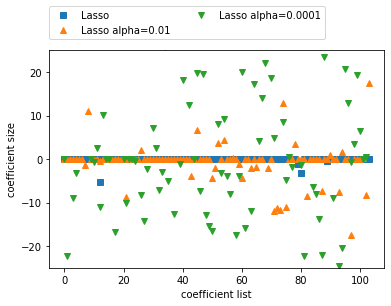

In [13]:
plt.plot(lasso.coef_, 's', label = "Lasso")
plt.plot(lasso_001.coef_, '^', label = "Lasso alpha=0.01") 
plt.plot(lasso_00001.coef_, 'v', label = "Lasso alpha=0.0001")
plt.legend(ncol=2, loc=(0, 1.05)) 
plt.ylim(-25, 25)
plt.xlabel("coefficient list") # 피처의 수
plt.ylabel("coefficient size") # 회귀 계수의 크기

# 일반적으로 모든 피처를 활용하는 리지 회귀모델을 선호,
# 하지만 많은 피처 중 일주 피처를 선호한다면 Lasso모델이 나을 수 있음.

In [14]:
# 로지스틱 회귀, 서포트 벡터 머신

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


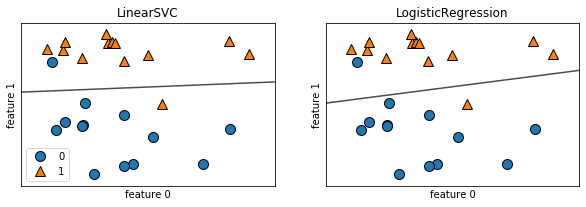

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

gif, axes = plt.subplots(1,2,figsize=(10, 3))

for model, ax in zip([LinearSVC( ), LogisticRegression( )], axes): 
    clf = model.fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title(clf.__class__.__name__) 
    ax.set_xlabel("feature 0") 
    ax.set_ylabel("feature 1") 
axes[0].legend( )

# L2규제는 Ridge와 동일, 과대적합 감소를 위한 규제이다.

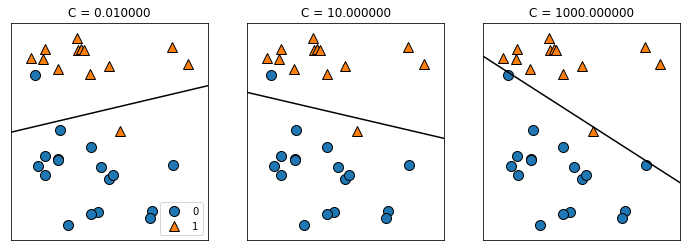

In [18]:
mglearn.plots.plot_linear_svc_regularization()

# 왼쪽은 규제 많이 적용, 오른쪽모델은 과대적합

In [19]:
# LinearSvc

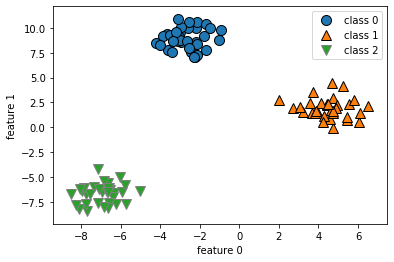

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

In [23]:
linear_svm = LinearSVC().fit(X, y)
print("회귀 계수 배열의 크기:", linear_svm.coef_.shape)
print("절편 배열의 크기:", linear_svm.intercept_.shape)

회귀 계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


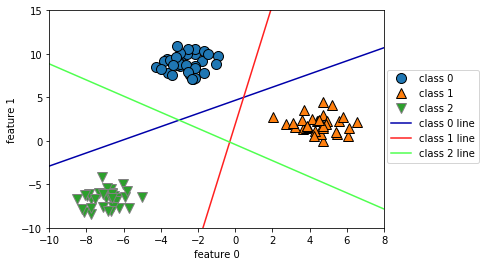

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line = np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  mglearn.cm3.colors): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15) 
plt.xlim(-10, 8) 
plt.xlabel("feature 0") 
plt.ylabel("feature 1") 
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 line', 'class 1 line',
         'class 2 line'], loc=(1.01, 0.3))

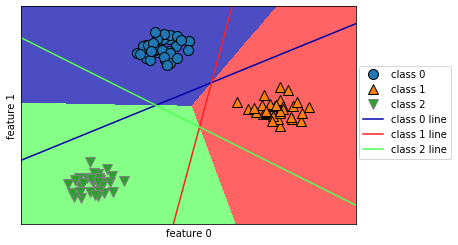

In [26]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
line=np.linspace(-15, 15) 
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  mglearn.cm3.colors): 
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) 
plt.xlabel("feature 0") 
plt.ylabel("feature 1") 
plt.legend(['class 0', 'class 1', 'class 2', 'class 0 line', 'class 1 line', 
            'class 2 line'], loc=(1.01, 0.3))

In [27]:
# 장단점과 매개변수
# 매개변수 - 회귀모델 : alpha -> 값이 클수록 모델 단순(일반화)
#           -LinearSvc와 LogisticRegression : -> 값이 작읈수록 모델 단순
# L1과 L2규제
# L1 : 중요한 피처가 많지 않을 경우 사용
# L2 : 과대적합을 줄임(기본적으로 사용)

In [28]:
# 나이브 베이즈 분류기

In [58]:
from sklearn.naive_bayes import GaussianNB

tennis_data = pd.read_csv('playtennis.csv')
tennis_data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [59]:
tennis_data.outlook = tennis_data.outlook.replace('Sunny', 0) 
tennis_data.outlook = tennis_data.outlook.replace('Overcast', 1) 
tennis_data.outlook = tennis_data.outlook.replace('Rain', 2)

tennis_data.temp = tennis_data.temp.replace('Hot', 3) 
tennis_data.temp = tennis_data.temp.replace('Mild', 4) 
tennis_data.temp = tennis_data.temp.replace('Cool', 5)
tennis_data.humidity = tennis_data.humidity.replace('High', 6) 
tennis_data.humidity = tennis_data.humidity.replace('Normal', 7)

tennis_data.wind = tennis_data.wind.replace('Weak', 8) 
tennis_data.wind = tennis_data.wind.replace('Strong', 9)

tennis_data.play = tennis_data.play.replace('No', 10) 
tennis_data.play = tennis_data.play.replace('Yes', 11) 

tennis_data

,day,outlook,temp,humidity,wind,play
0,D1,0,3,6,8,10
1,D2,0,3,6,9,10
2,D3,1,3,6,8,11
3,D4,2,4,6,8,11
4,D5,2,5,7,8,11
5,D6,2,5,7,9,10
6,D7,1,5,7,9,11
7,D8,0,4,6,8,10
8,D9,0,5,7,8,11
9,D10,2,4,7,8,11


In [60]:
X = np.array(pd.DataFrame(tennis_data, columns = ['outlook', 'temp', 'humidity', 'wind'])) 
y = np.array(pd.DataFrame(tennis_data, columns = ['play']))

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

In [61]:
gnb_clf = GaussianNB( ) 


In [62]:
gnb_clf = gnb_clf.fit(X_train, y_train)

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
gnb_prediction = gnb_clf.predict(X_test)
print(gnb_prediction)

[10 10 11 11]


In [65]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, gnb_prediction))


Confusion Matrix: 
[[1 0]
 [1 2]]


In [69]:
print("Classification Report")
print(classification_report(y_test, gnb_prediction))

Classification Report
              precision    recall  f1-score   support

          10       0.50      1.00      0.67         1
          11       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [71]:
A_prediction = gnb_clf.predict([[0, 5,6, 9]]) 
# 0: sunny(outlook), 5: cool(temp), 6: high(humidity), 9: strong(wind)
print(A_prediction)

[10]
